In [27]:
from pandas import read_csv
from ast import literal_eval
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [33]:
def read_data(part_id, operation_type):
    file_dir = "part"+str(part_id)+"_"+operation_type+"_header.csv"
    raw_df = read_csv(file_dir)
    return raw_df


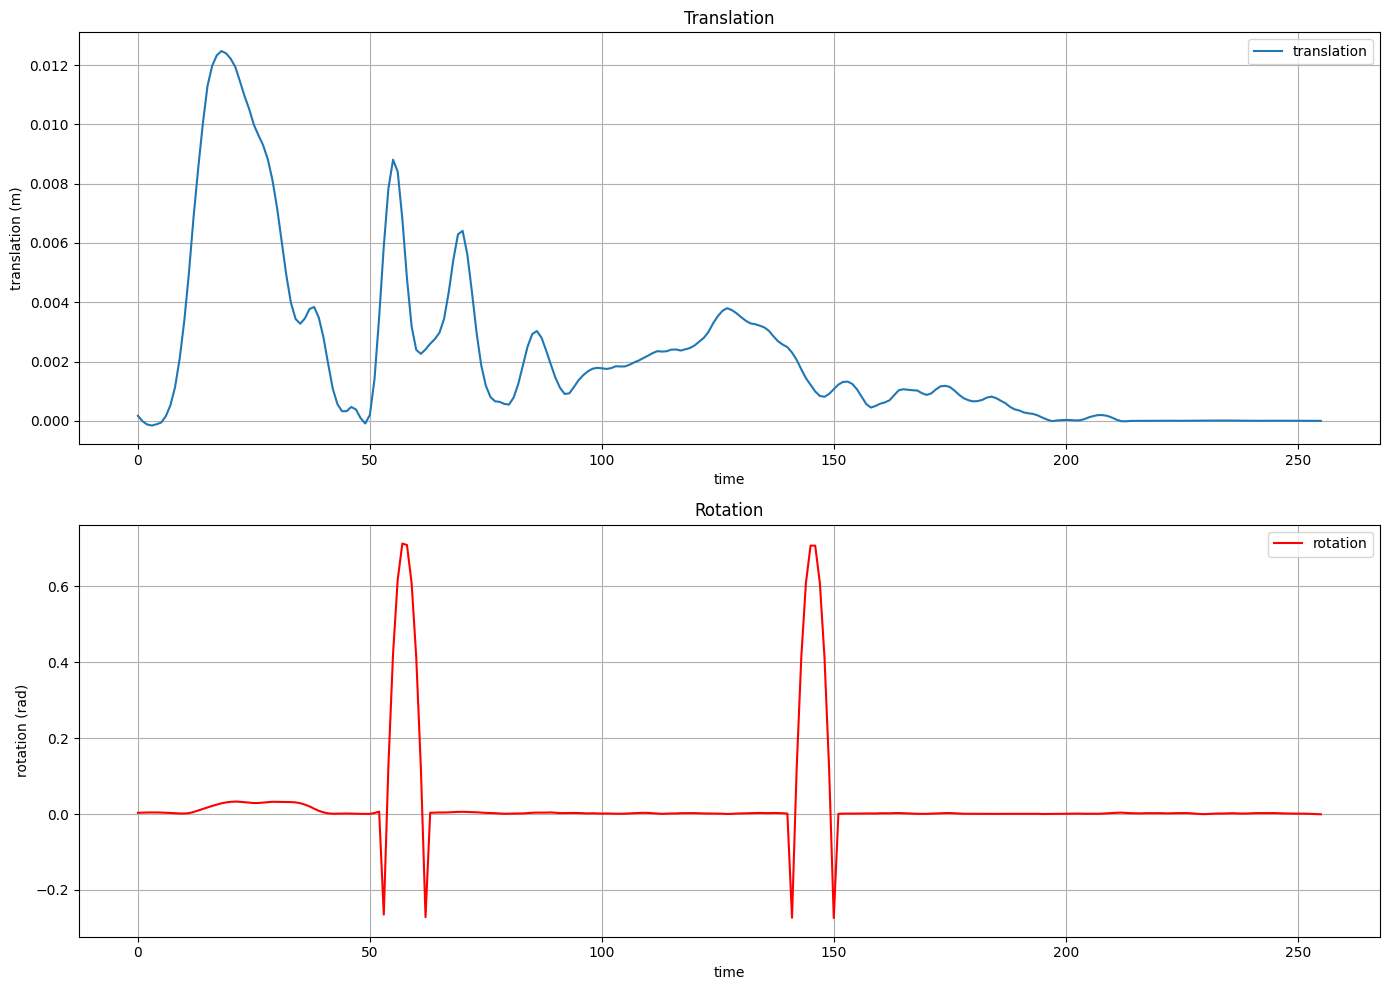

In [59]:
part_id = 6
task_id = 3
trial_id = 2
section_id = 2

operation_type = "kt"

# df = read_data(6, "kt")
df = read_data(part_id, operation_type)
df = df[(df['task_id']==task_id) & (df['trial_id']==trial_id) & (df['section']==section_id)]
df

inc_trans_list = df['inc_trans'].tolist()
inc_trans_list = [literal_eval(lst) for lst in inc_trans_list]

inc_rot_list = df['inc_rot'].tolist()
inc_rot_list = [literal_eval(lst) for lst in inc_rot_list]

# look at section 2 for now
trans_list = inc_trans_list[0]
rot_list = inc_rot_list[0]

# apply Savitzky-Golay smoothing filter
window_size = 10
poly_order = 2
trans_list = savgol_filter(trans_list, window_size, poly_order)
rot_list = savgol_filter(rot_list, window_size, poly_order)


# Create a figure and two subplots in a vertical layout
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# First subplot
ax1.plot(trans_list, label='translation')
ax1.set_title('Translation')
ax1.set_xlabel('time')
ax1.set_ylabel('translation (m)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2.plot(rot_list, label='rotation', color='r')
ax2.set_title('Rotation')
ax2.set_xlabel('time')
ax2.set_ylabel('rotation (rad)')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()